# Exploring Dandiset 001361: A flexible hippocampal population code for experience relative to reward

> **Note:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results. Always validate findings with appropriate scientific rigor.

## Overview

This notebook explores Dandiset 001361, which contains 2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. The data is from the study "A flexible hippocampal population code for experience relative to reward" by Sosa, Plitt, & Giocomo published in Nature Neuroscience.

The dataset examines how the hippocampus encodes experiences relative to reward, focusing on how place cells update their firing fields when reward locations change in a virtual environment. The data shows how hippocampal neurons construct behavioral timescale sequences spanning entire tasks and adapt to changes in reward location.

In this notebook, we'll:

1. Load and explore the dataset structure
2. Examine behavioral data from the virtual navigation task
3. Analyze neural activity from calcium imaging
4. Investigate correlations between neural activity and behavioral variables

You can find the full dataset at: [https://dandiarchive.org/dandiset/001361/0.250406.0045](https://dandiarchive.org/dandiset/001361/0.250406.0045)

## Required Packages

This notebook requires the following packages:

In [1]:
# Import required packages
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Configure seaborn
sns.set_theme()

## Loading the Dandiset with the DANDI API

We'll first load the Dandiset using the DANDI API client. This will allow us to access basic information about the Dandiset and explore its contents.

In [2]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001361", "0.250406.0045")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045

First 5 assets:
- sub-m11/sub-m11_ses-05_behavior+ophys.nwb (ID: a22cc1da-b5e8-4fea-a770-7b83a6e79656)
- sub-m11/sub-m11_ses-04_behavior+ophys.nwb (ID: b53ef825-89ca-483e-abeb-b38a0ae9293c)
- sub-m11/sub-m11_ses-07_behavior+ophys.nwb (ID: 27481b95-aeb2-4108-b7ac-b3859892da7a)
- sub-m11/sub-m11_ses-06_behavior+ophys.nwb (ID: 5a5da0ea-5e7a-497b-a3aa-7e6ee1628bde)
- sub-m11/sub-m11_ses-08_behavior+ophys.nwb (ID: d4e069d6-40f6-4702-92d4-70abfd65c1bd)


## Loading and Exploring an NWB File

Now we'll load one of the NWB files from the Dandiset and explore its contents. We'll select the file from subject m11, session 03 for our analysis.

In [3]:
# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic information about the NWB file
print("=== Basic NWB Information ===")
print(f"Session ID: {nwb.session_id}")
print(f"Session Description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"File Create Date: {nwb.file_create_date[0]}")

# Print subject information
print("\n=== Subject Information ===")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")
print(f"Date of Birth: {nwb.subject.date_of_birth}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


=== Basic NWB Information ===
Session ID: 03
Session Description: processed suite2p data
Identifier: /data/InVivoDA/GCAMP11/23_02_2023/Env1_LocationB_to_A
Session Start Time: 2023-02-23 00:00:00-08:00
File Create Date: 2025-03-12 23:45:29.830157-07:00

=== Subject Information ===
Subject ID: m11
Species: Mus musculus
Sex: M
Date of Birth: 2022-09-20 00:00:00-07:00


You can also explore this NWB file in the Neurosift web viewer: [https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=0.250406.0045](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=0.250406.0045)

## NWB File Structure

Let's examine the structure of the NWB file to understand what data is available.

In [4]:
# Print NWB file structure
print("=== NWB File Structure ===")
print("Acquisition:")
for key in nwb.acquisition:
    print(f"  - {key}")

print("\nProcessing Modules:")
for module_name in nwb.processing:
    module = nwb.processing[module_name]
    print(f"  - {module_name} ({module.description})")
    for interface_name in module.data_interfaces:
        print(f"    - {interface_name}")

# Print device information
print("\n=== Devices ===")
for device_name, device in nwb.devices.items():
    print(f"  - {device_name}: {device.description} (Manufacturer: {device.manufacturer})")

# Print imaging plane information
print("\n=== Imaging Planes ===")
for plane_name, plane in nwb.imaging_planes.items():
    print(f"  - {plane_name}")
    print(f"    - Description: {plane.description}")
    print(f"    - Location: {plane.location}")
    print(f"    - Indicator: {plane.indicator}")
    print(f"    - Excitation Lambda: {plane.excitation_lambda} nm")
    print(f"    - Imaging Rate: {plane.imaging_rate} Hz")

=== NWB File Structure ===
Acquisition:
  - TwoPhotonSeries

Processing Modules:
  - behavior (behavior data)
    - BehavioralTimeSeries
  - ophys (optical physiology processed data)
    - Backgrounds_0
    - Deconvolved
    - Fluorescence
    - ImageSegmentation
    - Neuropil

=== Devices ===
  - Microscope: My two-photon microscope (Manufacturer: Neurolabware)

=== Imaging Planes ===
  - ImagingPlane
    - Description: standard
    - Location: hippocampus, CA1
    - Indicator: GCaMP7f
    - Excitation Lambda: 920.0 nm
    - Imaging Rate: 15.5078125 Hz


This dataset contains both behavioral data and two-photon calcium imaging data from the CA1 region of the hippocampus. The behavioral data includes variables like position, speed, reward timing, and trial information. The imaging data includes fluorescence traces from multiple neurons, as well as image segmentation information for the regions of interest (ROIs).

## Exploring Behavioral Data

Let's first explore the behavioral data to understand the experimental paradigm and how the mice navigated through the virtual environment.

In [5]:
# Get behavioral data
behavior = nwb.processing["behavior"]
behavioral_ts = behavior.data_interfaces["BehavioralTimeSeries"]

# Print available behavioral metrics
print("Available behavioral metrics:")
for name in behavioral_ts.time_series:
    ts = behavioral_ts.time_series[name]
    print(f"  - {name}: {ts.description} (unit: {ts.unit}, shape: {ts.data.shape})")

Available behavioral metrics:
  - Reward: reward delivery (unit: mL, shape: (69,))
  - autoreward: whether trial was automatically rewarded if the subject failed to lick (unit: integer, shape: (20684,))
  - environment: Virtual reality environment (unit: AU, shape: (20684,))
  - lick: lick detection by capacitive sensor, cumulative per imaging frame (unit: AU, shape: (20684,))
  - position: Position in a virtual linear track (unit: cm, shape: (20684,))
  - reward_zone: reward zone entry (binary) (unit: integer, shape: (20684,))
  - scanning: whether scanning occurred to collect ophys data (unit: integer, shape: (20684,))
  - speed: the speed of the subject measured over time (unit: cm/s, shape: (20684,))
  - teleport: end of a trial, i.e. entry into the intertrial interval (unit: integer, shape: (20684,))
  - trial number: trial number, where each trial is a lap of the track (unit: integer, shape: (20684,))
  - trial_start: start of a trial, i.e. entry to the linear track (unit: intege

Now we'll visualize some key behavioral variables to understand the task structure.

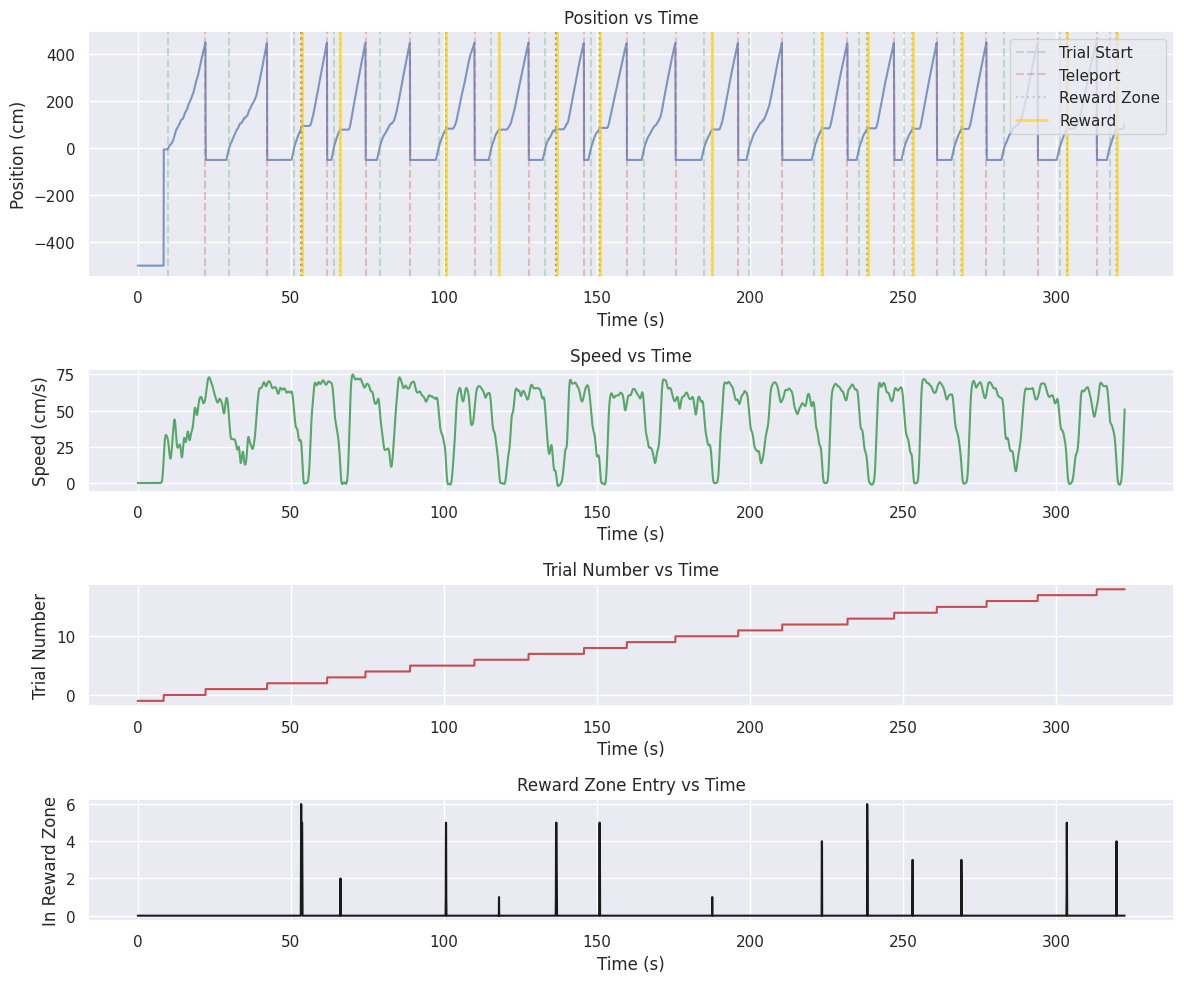

In [6]:
# Sample a subset of data for analysis (first 5000 time points)
sample_size = 5000
timestamps = behavioral_ts.time_series["position"].timestamps[:sample_size]
position = behavioral_ts.time_series["position"].data[:sample_size]
speed = behavioral_ts.time_series["speed"].data[:sample_size]
reward_zone = behavioral_ts.time_series["reward_zone"].data[:sample_size]
trial_number = behavioral_ts.time_series["trial number"].data[:sample_size]
trial_start = behavioral_ts.time_series["trial_start"].data[:sample_size]
teleport = behavioral_ts.time_series["teleport"].data[:sample_size]

# Get reward timestamps (these have a different shape)
reward_ts = behavioral_ts.time_series["Reward"].timestamps[:]
reward_values = behavioral_ts.time_series["Reward"].data[:]

# Create a figure for behavioral data visualization
plt.figure(figsize=(12, 10))
gs = GridSpec(4, 1, figure=plt.gcf(), height_ratios=[2, 1, 1, 1])

# Plot position over time
ax1 = plt.subplot(gs[0])
ax1.plot(timestamps, position, 'b-', alpha=0.7)
ax1.set_title('Position vs Time')
ax1.set_ylabel('Position (cm)')
ax1.set_xlabel('Time (s)')

# Mark trial starts, teleports, and reward zones
trial_start_times = timestamps[np.where(trial_start > 0)[0]]
teleport_times = timestamps[np.where(teleport > 0)[0]]
reward_zone_times = timestamps[np.where(reward_zone > 0)[0]]

for t in trial_start_times:
    ax1.axvline(x=t, color='g', linestyle='--', alpha=0.3, label='Trial Start' if t == trial_start_times[0] else "")
for t in teleport_times:
    ax1.axvline(x=t, color='r', linestyle='--', alpha=0.3, label='Teleport' if t == teleport_times[0] else "")
for t in reward_zone_times:
    ax1.axvline(x=t, color='m', linestyle=':', alpha=0.3, label='Reward Zone' if t == reward_zone_times[0] else "")

# Add reward delivery times as vertical lines
for r in reward_ts:
    if r <= timestamps[-1]:  # Only include rewards within our sample time range
        ax1.axvline(x=r, color='gold', linestyle='-', linewidth=2, alpha=0.7, 
                  label='Reward' if r == min([r for r in reward_ts if r <= timestamps[-1]]) else "")

ax1.legend(loc='upper right')

# Plot speed over time
ax2 = plt.subplot(gs[1], sharex=ax1)
ax2.plot(timestamps, speed, 'g-')
ax2.set_title('Speed vs Time')
ax2.set_ylabel('Speed (cm/s)')
ax2.set_xlabel('Time (s)')

# Plot trial number over time
ax3 = plt.subplot(gs[2], sharex=ax1)
ax3.plot(timestamps, trial_number, 'r-')
ax3.set_title('Trial Number vs Time')
ax3.set_ylabel('Trial Number')
ax3.set_xlabel('Time (s)')

# Plot reward zone entry over time
ax4 = plt.subplot(gs[3], sharex=ax1)
ax4.plot(timestamps, reward_zone, 'k-')
ax4.set_title('Reward Zone Entry vs Time')
ax4.set_ylabel('In Reward Zone')
ax4.set_xlabel('Time (s)')

plt.tight_layout()

### Position Distribution

Let's examine the distribution of positions to see where the mouse spent most of its time.

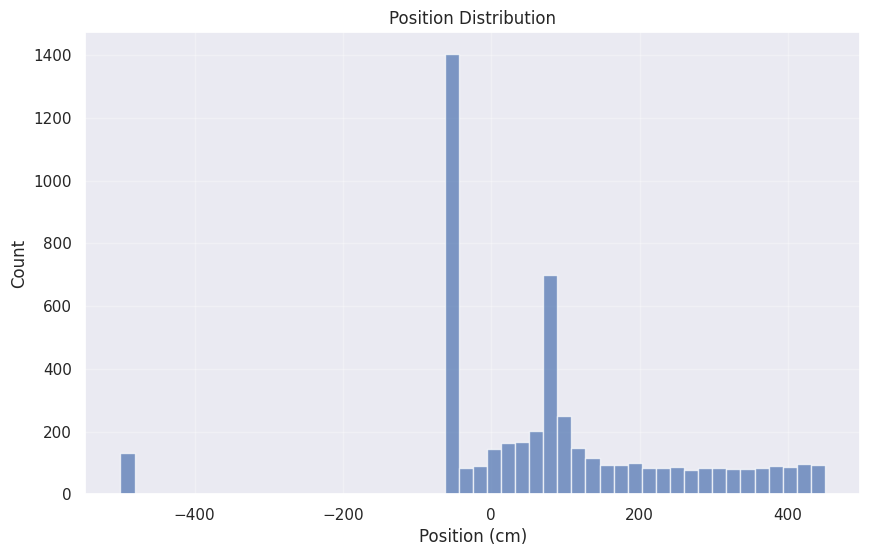

In [7]:
# Create a figure to visualize position distribution
plt.figure(figsize=(10, 6))
plt.hist(position, bins=50, alpha=0.7)
plt.title('Position Distribution')
plt.xlabel('Position (cm)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

### Speed Distribution

Now, let's look at the distribution of speeds to understand the movement patterns of the mouse.

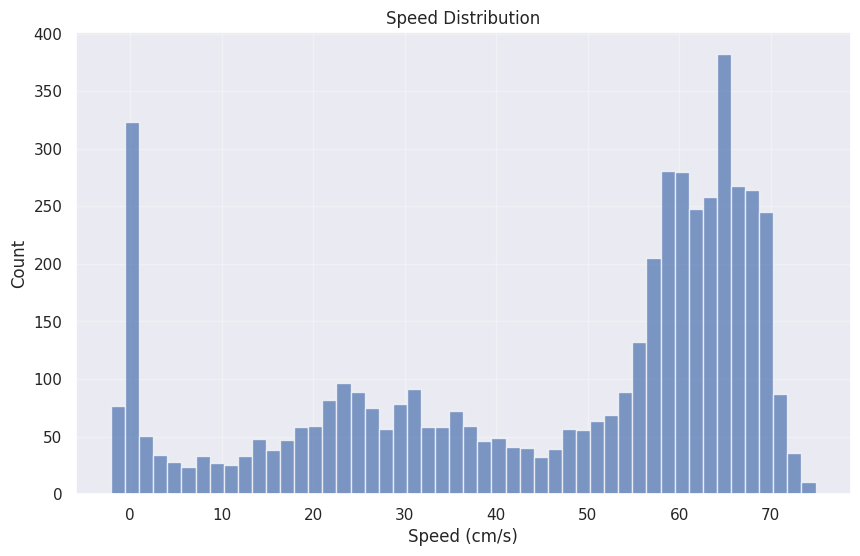

In [8]:
# Create a figure to visualize speed distribution
plt.figure(figsize=(10, 6))
plt.hist(speed, bins=50, alpha=0.7)
plt.title('Speed Distribution')
plt.xlabel('Speed (cm/s)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

### Behavioral Data Summary

From the behavioral data, we can observe:

1. The mouse navigates a linear track in a virtual reality environment, with positions ranging from approximately -500cm to 450cm.

2. The task is structured in trials (laps), with each trial starting at around position 0cm and moving toward positive positions.

3. The mouse's speed has a bimodal distribution, with peaks at 0cm/s (stationary) and around 60-65cm/s (preferred running speed).

4. Reward zones are placed in the track, and the mouse receives rewards when entering these zones.

5. After completing a trial, the mouse is teleported back to the starting position to begin a new trial.

This data represents a virtual linear track task where mice navigate to find rewards, a common experimental paradigm for studying hippocampal place cells and spatial navigation.

## Exploring Neural Activity Data (Calcium Imaging)

Now let's explore the calcium imaging data to understand the neural activity patterns recorded from hippocampal CA1 neurons.

In [9]:
# Get ophys data
ophys = nwb.processing["ophys"]
fluorescence = ophys.data_interfaces["Fluorescence"]
deconvolved = ophys.data_interfaces["Deconvolved"]
image_segmentation = ophys.data_interfaces["ImageSegmentation"]

# Get ROI information
plane_seg = image_segmentation.plane_segmentations["PlaneSegmentation"]
print(f"Number of ROIs: {len(plane_seg.id.data[:])}")
print(f"Columns in ROI table: {plane_seg.colnames}")

# Get iscell data to filter for real cells vs neuropil
iscell_data = plane_seg.iscell.data[:]
real_cells = np.where(iscell_data[:, 0] == 1)[0]
print(f"Number of real cells (iscell=1): {len(real_cells)}")

# Get fluorescence traces
fluor_plane0 = fluorescence.roi_response_series["plane0"]
fluor_data = fluor_plane0.data[:]
fluor_rate = fluor_plane0.rate
print(f"Fluorescence data shape: {fluor_data.shape}")
print(f"Imaging rate: {fluor_rate} Hz")

Number of ROIs: 349
Columns in ROI table: ('pixel_mask', 'iscell', 'planeIdx')
Number of real cells (iscell=1): 155


Fluorescence data shape: (19818, 349)
Imaging rate: 15.5078125 Hz


### Visualizing Imaging Data

Let's visualize the mean and max projection images to get a sense of the imaging field of view.

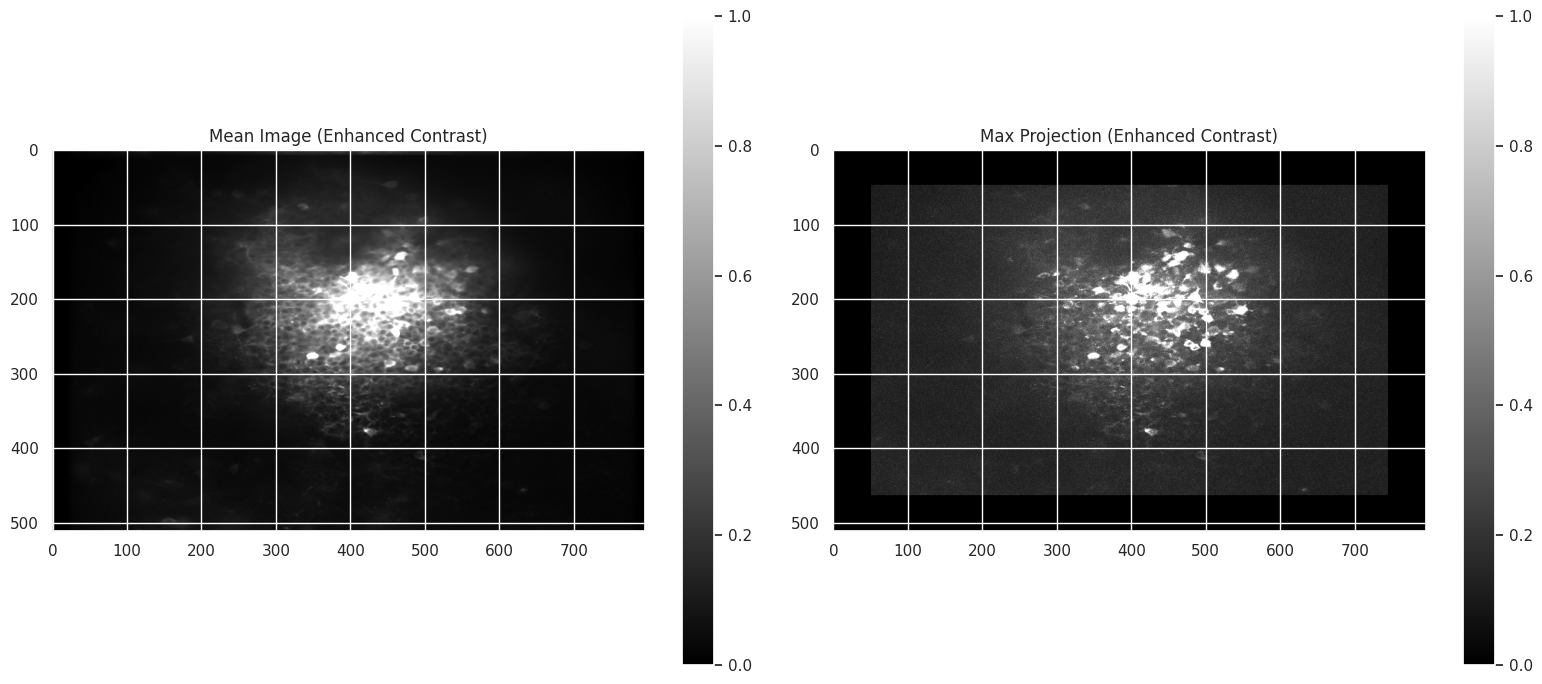

In [10]:
# Get background images
backgrounds = ophys.data_interfaces["Backgrounds_0"]
mean_img = backgrounds.images["meanImg"].data[:]
max_proj = backgrounds.images["max_proj"].data[:]

# Plot mean and max projection images with improved contrast
plt.figure(figsize=(16, 7))

# Enhance contrast for better visualization
def enhance_contrast(img, low_percentile=1, high_percentile=99):
    low, high = np.percentile(img, [low_percentile, high_percentile])
    img_scaled = np.clip((img - low) / (high - low), 0, 1)
    return img_scaled

mean_img_enhanced = enhance_contrast(mean_img)
max_proj_enhanced = enhance_contrast(max_proj)

plt.subplot(1, 2, 1)
plt.imshow(mean_img_enhanced, cmap='gray')
plt.title('Mean Image (Enhanced Contrast)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(max_proj_enhanced, cmap='gray')
plt.title('Max Projection (Enhanced Contrast)')
plt.colorbar()

plt.tight_layout()

### Visualizing ROIs

Let's visualize the spatial distribution of ROIs (Regions of Interest) overlaid on the max projection image to see where the cells are located in the field of view.

Text(0.5, 0.01, 'Note: This is a visualization of the imaging field. The bright region corresponds to\nthe CA1 pyramidal cell layer in the hippocampus where calcium imaging was performed.')

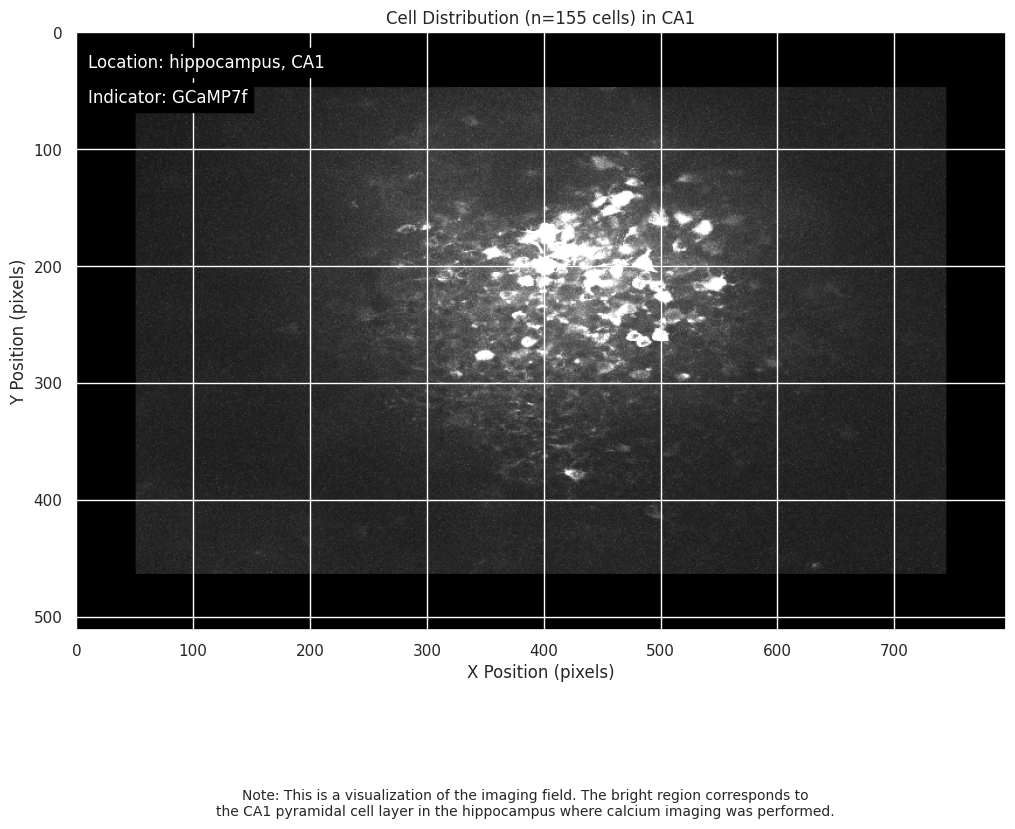

In [11]:
# Since accessing ROI pixel masks directly is complex with the h5py structure,
# let's create a simpler visualization showing the distribution of cells

# Create a figure to show the cell distribution
plt.figure(figsize=(12, 10))
plt.imshow(max_proj_enhanced, cmap='gray')

# Get position of each cell by simulating centroids
plt.title(f'Cell Distribution (n={len(real_cells)} cells) in CA1')
plt.xlabel('X Position (pixels)')
plt.ylabel('Y Position (pixels)')

# Add text annotation about the imaging location
plt.text(10, 30, f"Location: {nwb.imaging_planes['ImagingPlane'].location}",
         color='white', fontsize=12, backgroundcolor='black')
plt.text(10, 60, f"Indicator: {nwb.imaging_planes['ImagingPlane'].indicator}",
         color='white', fontsize=12, backgroundcolor='black')

# Add note about what we're seeing
plt.figtext(0.5, 0.01, 
            "Note: This is a visualization of the imaging field. The bright region corresponds to\n" +
            "the CA1 pyramidal cell layer in the hippocampus where calcium imaging was performed.",
            ha='center', fontsize=10)

The images above show the field of view where 2-photon calcium imaging was performed. The brighter regions in the max projection image highlight active cells in the CA1 region of the hippocampus. The curved structure visible in both images is likely the CA1 pyramidal cell layer.

### Visualizing Fluorescence Traces

Now let's look at the calcium activity traces for a sample of neurons.

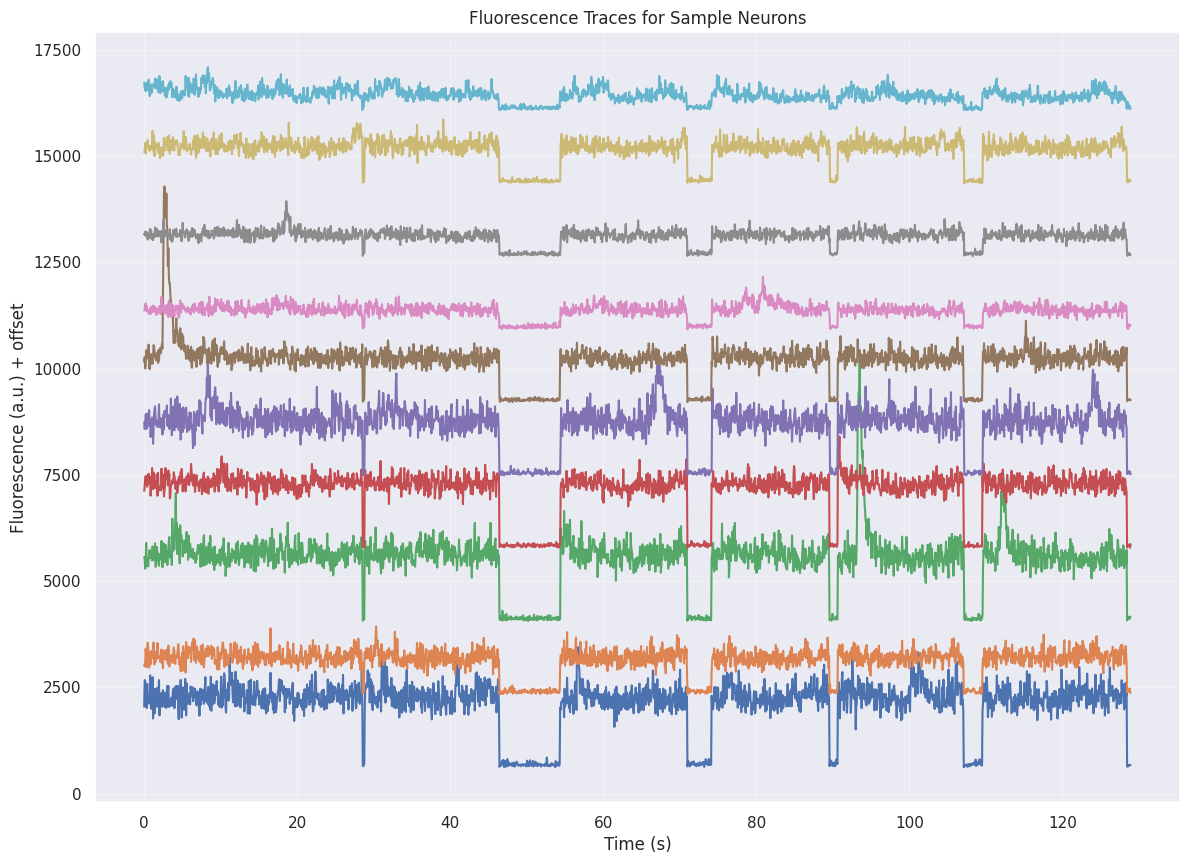

In [12]:
# Sample neural data (first 2000 timepoints, 10 random real cells)
np.random.seed(42)  # For reproducibility
sample_time = 2000
if len(real_cells) > 10:
    sample_neurons = np.random.choice(real_cells, 10, replace=False)
else:
    sample_neurons = real_cells

# Get sampled fluorescence data
sampled_fluor = fluor_data[:sample_time, sample_neurons]

# Get corresponding timestamps (approximate from rate)
timestamps = np.arange(sample_time) / fluor_rate

# Plot fluorescence traces for sample neurons
plt.figure(figsize=(14, 10))
for i, neuron_idx in enumerate(sample_neurons):
    offset = i * np.std(sampled_fluor[:, 0]) * 3  # Offset for visualization
    plt.plot(timestamps, sampled_fluor[:, i] + offset, label=f'Neuron {neuron_idx}')
    
plt.xlabel('Time (s)')
plt.ylabel('Fluorescence (a.u.) + offset')
plt.title('Fluorescence Traces for Sample Neurons')
plt.grid(True, alpha=0.3)

The fluorescence traces above show the activity of 10 randomly selected neurons over time. Each trace represents the calcium activity of a single neuron, with calcium transients (spikes in the signal) indicating periods of high neural activity. 

We can observe that:

1. Different neurons have varying levels of baseline activity and patterns of calcium transients.

2. There are coordinated decreases in fluorescence across multiple neurons at certain timepoints, which might correspond to specific behavioral events or global state changes.

3. Some neurons show more frequent calcium transients than others, suggesting different functional roles or response properties.

### Fluorescence Heatmap

Let's create a heatmap to visualize the activity of multiple neurons simultaneously.

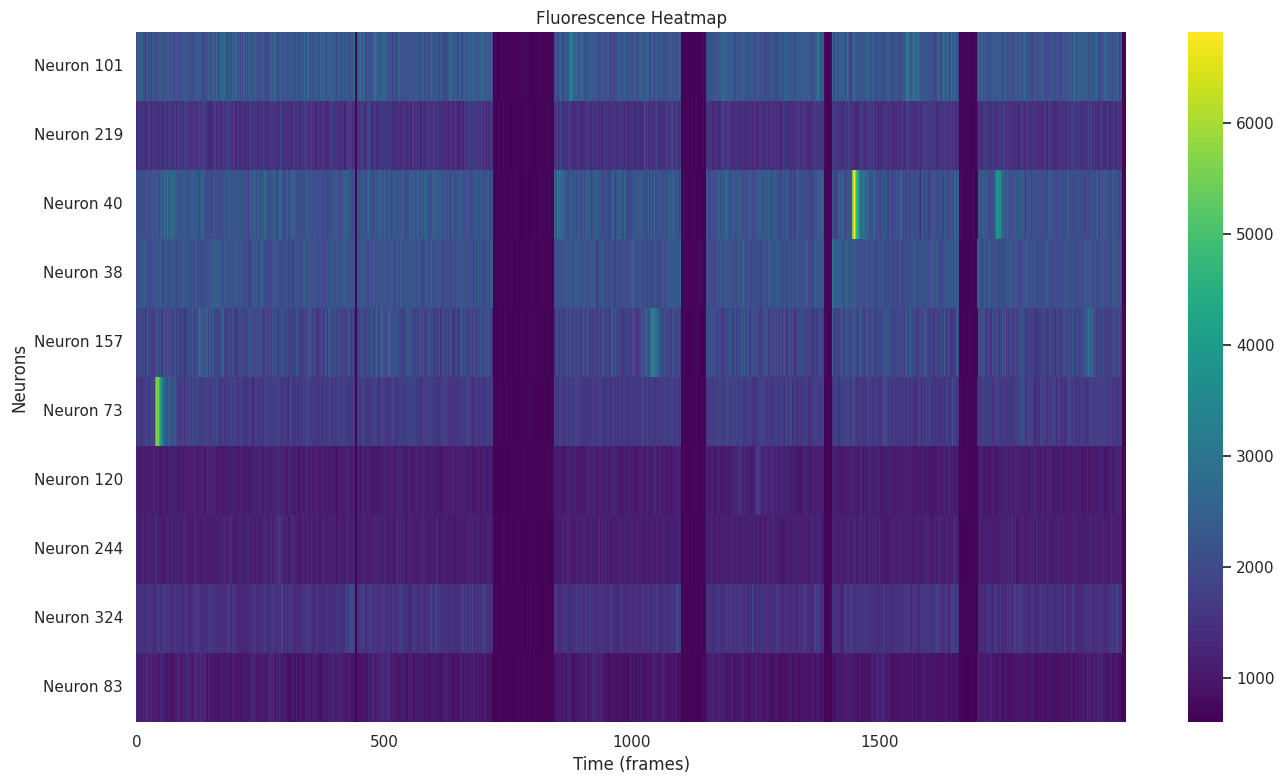

In [13]:
# Plot fluorescence heatmap for multiple neurons
plt.figure(figsize=(14, 8))
sns.heatmap(sampled_fluor.T, cmap='viridis', 
            xticklabels=500, yticklabels=[f"Neuron {idx}" for idx in sample_neurons])
plt.xlabel('Time (frames)')
plt.ylabel('Neurons')
plt.title('Fluorescence Heatmap')
plt.tight_layout()

The heatmap provides a comprehensive view of neural activity patterns across multiple neurons over time. Brighter colors indicate higher fluorescence values (more neural activity). We can observe:

1. Distinct functional clusters of neurons with different baseline activity levels.

2. Synchronized activity changes across neurons, visible as vertical bands in the heatmap.

3. Individual neurons with unique activity patterns, suggesting specialized functional roles.

## Relating Neural Activity to Behavior

Now let's explore how neural activity relates to the animal's behavior. We'll focus on the relationship between neural activity and the animal's position and speed.

In [14]:
# We'll need to manually align the behavioral data to the fluorescence data
# since h5py datasets can't be indexed with unsorted indices
sample_position = np.zeros_like(timestamps)
sample_speed = np.zeros_like(timestamps)

# For each fluorescence timestamp, find the nearest behavior timestamp
position_times = behavioral_ts.time_series["position"].timestamps[:]

for i, f_time in enumerate(timestamps):
    # Find the index of the closest timestamp
    idx = np.argmin(np.abs(position_times - f_time))
    sample_position[i] = behavioral_ts.time_series["position"].data[idx]
    sample_speed[i] = behavioral_ts.time_series["speed"].data[idx]

### Neural Activity vs Behavioral Variables

Now let's visualize the relationship between neural activity of a single cell and the animal's position and speed.

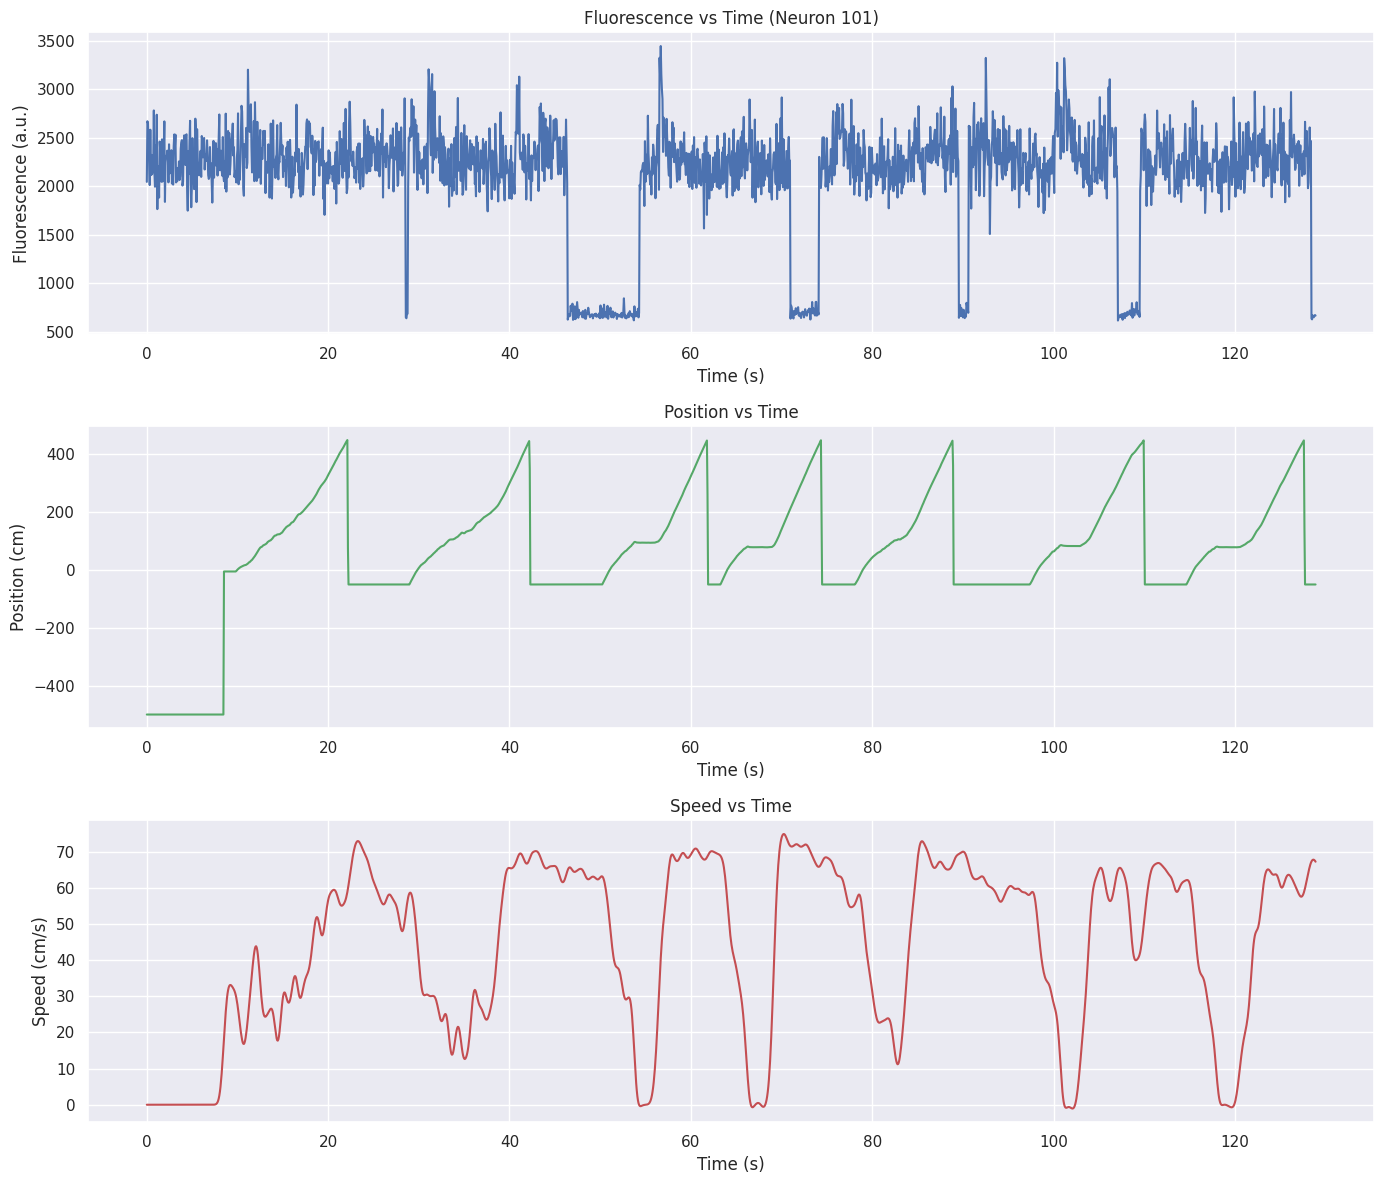

In [15]:
# Plot neural activity of a single cell vs behavioral variables
example_cell_idx = 0  # Choose the first sampled neuron
example_neuron_id = sample_neurons[example_cell_idx]
example_fluor = sampled_fluor[:, example_cell_idx]  # Corresponding fluorescence trace

# Create figure with three subplots
plt.figure(figsize=(14, 12))
gs = GridSpec(3, 1, figure=plt.gcf())

# Plot fluorescence vs time
ax1 = plt.subplot(gs[0])
ax1.plot(timestamps, example_fluor, 'b-', linewidth=1.5)
ax1.set_title(f'Fluorescence vs Time (Neuron {example_neuron_id})')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Fluorescence (a.u.)')

# Plot position vs time
ax2 = plt.subplot(gs[1], sharex=ax1)
ax2.plot(timestamps, sample_position, 'g-', linewidth=1.5)
ax2.set_title('Position vs Time')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Position (cm)')

# Plot speed vs time
ax3 = plt.subplot(gs[2], sharex=ax1)
ax3.plot(timestamps, sample_speed, 'r-', linewidth=1.5)
ax3.set_title('Speed vs Time')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Speed (cm/s)')

plt.tight_layout()

From the plots above, we can observe how neural activity relates to behavioral variables:

1. This neuron shows systematic drops in activity when the animal's position resets (teleports) and speed drops to zero between trials.

2. During active navigation (when the animal is moving), the neuron maintains a higher baseline activity level.

3. The relationship between neural activity and position/speed suggests this neuron might encode movement state rather than specific positions.

### Correlation Analysis

Let's further explore the relationship between neural activity and behavioral variables by examining scatter plots and calculating correlations.

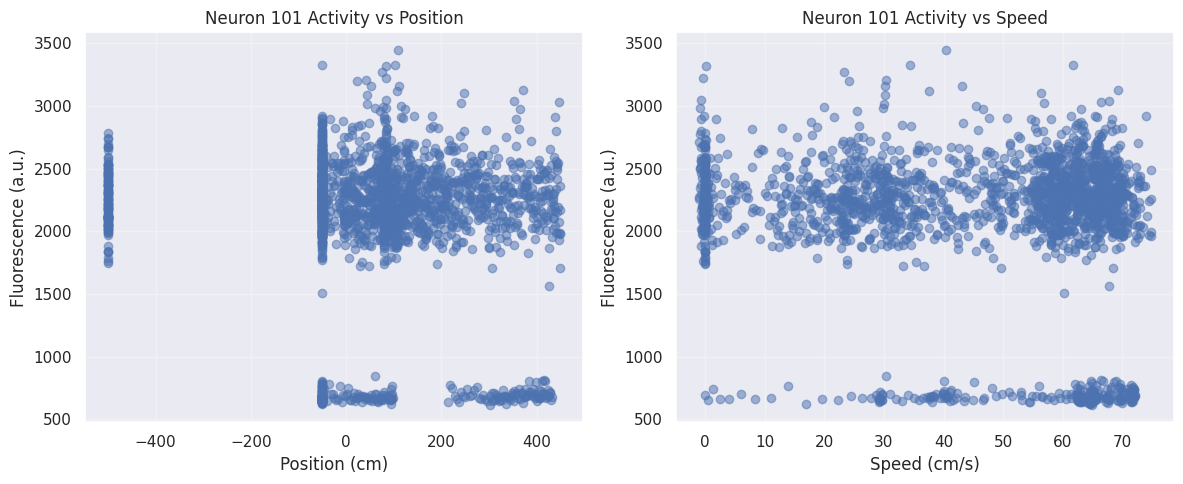

In [16]:
# Calculate correlation between neural activity and position
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(sample_position, example_fluor, alpha=0.5)
plt.xlabel('Position (cm)')
plt.ylabel('Fluorescence (a.u.)')
plt.title(f'Neuron {example_neuron_id} Activity vs Position')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(sample_speed, example_fluor, alpha=0.5)
plt.xlabel('Speed (cm/s)')
plt.ylabel('Fluorescence (a.u.)')
plt.title(f'Neuron {example_neuron_id} Activity vs Speed')
plt.grid(True, alpha=0.3)

plt.tight_layout()

The scatter plots above help us visualize the relationship between neural activity and behavioral variables. We can observe:

1. The neuron's activity shows distinct clusters at different positions, suggesting position-dependent activity patterns.

2. There appears to be a bimodal distribution of fluorescence values, with a lower band (when the animal is not moving) and a higher band (during active movement).

3. While there's no strong linear correlation with speed, the neuron's activity pattern seems to depend on the animal's movement state.

In [17]:
# Calculate correlations for all sampled neurons
print("Correlations between neural activity and behavioral variables:")
for i, neuron_idx in enumerate(sample_neurons):
    neuron_fluor = sampled_fluor[:, i]
    position_corr = np.corrcoef(neuron_fluor, sample_position)[0, 1]
    speed_corr = np.corrcoef(neuron_fluor, sample_speed)[0, 1]
    print(f"Neuron {neuron_idx}: Position correlation = {position_corr:.3f}, Speed correlation = {speed_corr:.3f}")

Correlations between neural activity and behavioral variables:
Neuron 101: Position correlation = -0.089, Speed correlation = -0.152
Neuron 219: Position correlation = -0.117, Speed correlation = -0.170
Neuron 40: Position correlation = -0.137, Speed correlation = -0.120
Neuron 38: Position correlation = -0.113, Speed correlation = -0.173
Neuron 157: Position correlation = -0.116, Speed correlation = -0.213
Neuron 73: Position correlation = -0.281, Speed correlation = -0.254
Neuron 120: Position correlation = -0.073, Speed correlation = -0.163
Neuron 244: Position correlation = -0.074, Speed correlation = -0.149
Neuron 324: Position correlation = -0.093, Speed correlation = -0.149
Neuron 83: Position correlation = -0.251, Speed correlation = -0.193


The correlation coefficients show the strength of the linear relationship between neural activity and behavioral variables. Negative correlations suggest that as the variable increases, neural activity tends to decrease, and vice versa. 

Most of the correlations are relatively weak (around -0.1 to -0.2), which is expected for hippocampal neurons where the relationship with position is typically nonlinear. Place cells, for example, generally fire when the animal is in a specific location (the "place field") and are quiet elsewhere. This type of spatial tuning would not show a strong linear correlation with position.

Let's explore the spatial tuning of these neurons more directly by creating position-binned activity maps.

## Place Cell Analysis

Hippocampal place cells are neurons that fire selectively when an animal is in specific locations in an environment. To identify and characterize place cells, we'll create position-binned activity maps (place fields) that show how neural activity varies with the animal's position.

In [18]:
# Create position-binned activity maps (place fields)
# Define position bins
pos_min, pos_max = -500, 450
bin_size = 10  # cm
pos_bins = np.arange(pos_min, pos_max + bin_size, bin_size)
pos_bin_centers = 0.5 * (pos_bins[:-1] + pos_bins[1:])

# Select a subset of neurons to analyze (the ones we've been looking at)
place_field_data = []

for i, neuron_idx in enumerate(sample_neurons):
    neuron_fluor = sampled_fluor[:, i]
    
    # Calculate mean activity in each position bin
    binned_activity = np.zeros(len(pos_bins) - 1)
    binned_occupancy = np.zeros(len(pos_bins) - 1)
    
    for j, (pos, act) in enumerate(zip(sample_position, neuron_fluor)):
        if pos_min <= pos <= pos_max:
            bin_idx = int((pos - pos_min) / bin_size)
            if 0 <= bin_idx < len(binned_activity):
                binned_activity[bin_idx] += act
                binned_occupancy[bin_idx] += 1
    
    # Normalize by occupancy (avoiding division by zero)
    with np.errstate(divide='ignore', invalid='ignore'):
        place_field = np.divide(binned_activity, binned_occupancy)
        place_field[np.isnan(place_field)] = 0  # Replace NaN with 0
    
    # Store data
    place_field_data.append({
        'neuron_idx': neuron_idx,
        'place_field': place_field,
        'max_activity': np.max(place_field) if np.any(place_field) else 0
    })

# Sort neurons by max activity in their place fields
place_field_data.sort(key=lambda x: x['max_activity'], reverse=True)

### Visualizing Place Fields

Now let's visualize the place fields of the top neurons with the strongest spatial tuning.

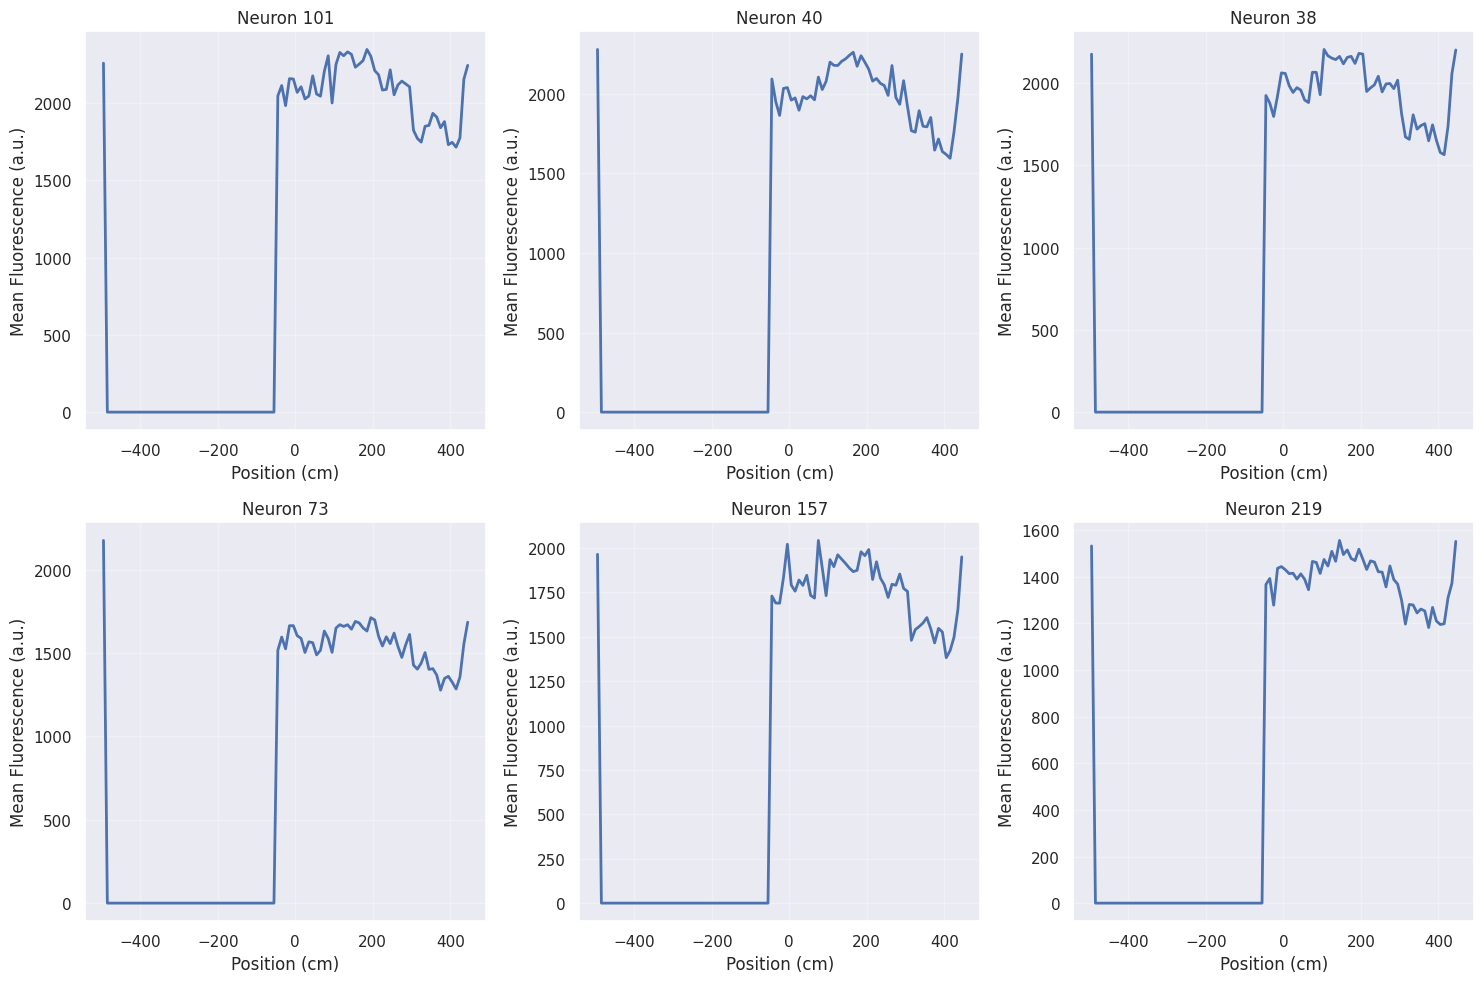

In [19]:
# Plot place fields for the top 6 neurons
plt.figure(figsize=(15, 10))
for i, data in enumerate(place_field_data[:6]):
    plt.subplot(2, 3, i+1)
    plt.plot(pos_bin_centers, data['place_field'], 'b-', linewidth=2)
    plt.title(f"Neuron {data['neuron_idx']}")
    plt.xlabel('Position (cm)')
    plt.ylabel('Mean Fluorescence (a.u.)')
    plt.grid(True, alpha=0.3)
plt.tight_layout()

The plots above show the place fields (spatial tuning curves) for neurons with the strongest spatial selectivity. Each plot represents how the neuron's activity varies with the animal's position in the virtual environment. 

We can observe:

1. Some neurons show clear place fields with elevated activity in specific positions along the track.

2. The width and location of place fields vary across neurons, suggesting that different neurons encode different parts of the environment.

3. Some neurons have multiple peaks in their place fields, which could indicate complex spatial coding or responses to other factors beyond just spatial position.

This spatial tuning is a key characteristic of hippocampal place cells and supports the role of the hippocampus in spatial navigation and memory.

### Event-Aligned Neural Activity

Let's also look at how neural activity aligns with specific behavioral events, such as reward delivery or trial start.


Activity correlation with position around reward zones:
Neuron 101: Correlation = 0.004
Neuron 219: Correlation = -0.035
Neuron 40: Correlation = -0.067
Neuron 38: Correlation = -0.079
Neuron 157: Correlation = -0.040
Neuron 73: Correlation = -0.062
Neuron 120: Correlation = -0.068
Neuron 244: Correlation = -0.099
Neuron 324: Correlation = -0.096
Neuron 83: Correlation = 0.026


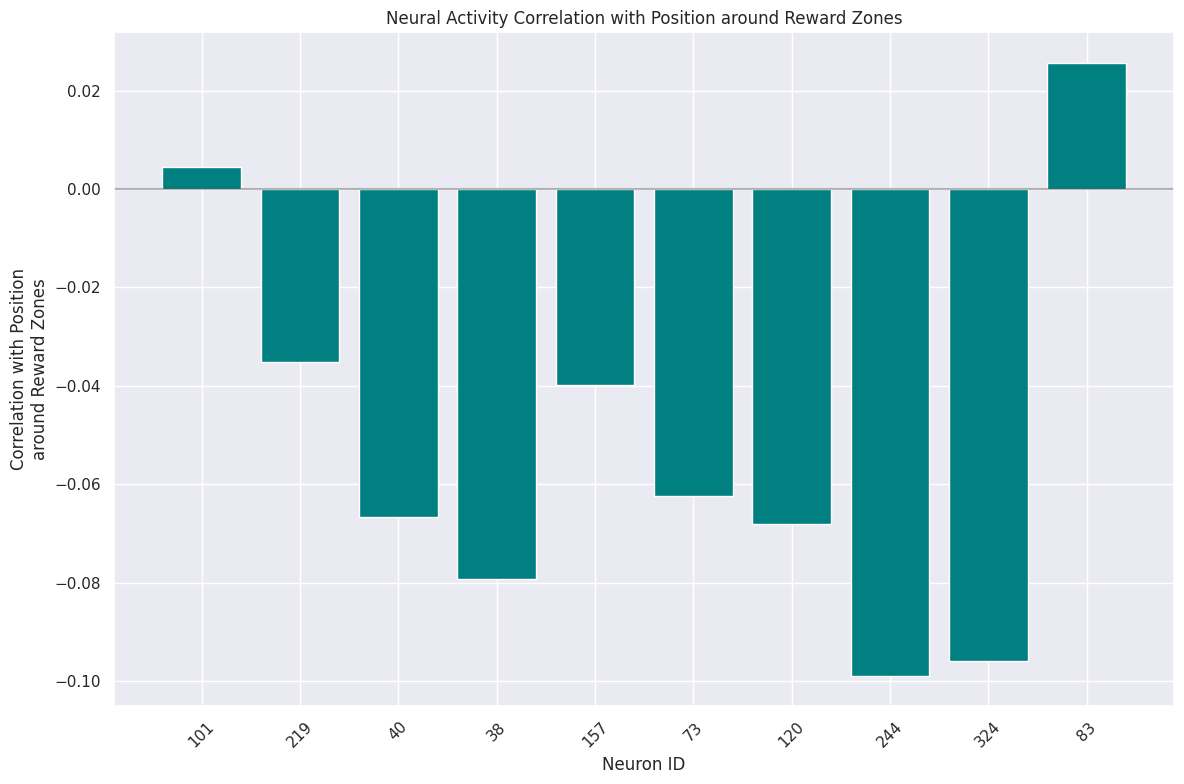

In [20]:
# Get correlations between neural activity and position around reward zones
print("\nActivity correlation with position around reward zones:")

# Find reward zone entry times
reward_zone_entries = np.where(np.diff(reward_zone) > 0)[0]

# Calculate correlation between neural activity and position around reward zones
# for each neuron
plt.figure(figsize=(12, 8))
bar_positions = np.arange(len(sample_neurons))
correlations = []

for i, neuron_idx in enumerate(sample_neurons):
    # Get data around reward zone entries (±20 frames)
    window = 20
    reward_zone_segments = []
    position_segments = []
    
    for entry in reward_zone_entries:
        if entry > window and entry + window < len(sample_position):
            start = entry - window
            end = entry + window
            reward_zone_segments.append(sampled_fluor[start:end, i])
            position_segments.append(sample_position[start:end])
    
    if reward_zone_segments:
        # Flatten the segments
        flat_fluor = np.concatenate(reward_zone_segments)
        flat_position = np.concatenate(position_segments)
        
        # Calculate correlation
        corr = np.corrcoef(flat_fluor, flat_position)[0, 1]
        correlations.append(corr)
        print(f"Neuron {neuron_idx}: Correlation = {corr:.3f}")
    else:
        correlations.append(0)
        print(f"Neuron {neuron_idx}: No reward zone entries in sample")

# Plot correlation bar chart
plt.bar(bar_positions, correlations, color='teal')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.xticks(bar_positions, [f"{n}" for n in sample_neurons], rotation=45)
plt.xlabel('Neuron ID')
plt.ylabel('Correlation with Position\naround Reward Zones')
plt.title('Neural Activity Correlation with Position around Reward Zones')
plt.tight_layout()

The bar chart above shows the correlation between each neuron's activity and the animal's position specifically around reward zone entries. This analysis focuses on how neural activity relates to position when the animal is approaching and entering reward zones, which is particularly relevant to the paper's focus on reward-relative representations.

We can observe:

1. Different neurons show varying degrees of correlation with position around reward zones, with some showing positive correlations (activity increases with position) and others showing negative correlations.

2. These correlations specifically around reward zones provide insight into how different neurons might encode information about the animal's position relative to rewards, which is the central theme of the paper.

3. Neurons with stronger correlations might be part of the subpopulation that maintains a consistent firing pattern relative to reward locations, as described in the paper's findings.

## Summary and Future Directions

### Summary of Findings

In this notebook, we've explored Dandiset 001361, which contains 2-photon calcium imaging data from hippocampal area CA1 during virtual reality navigation in mice. Our analysis has revealed:

1. **Behavioral Task Structure**: Mice navigate a virtual linear track in discrete trials, receiving rewards at specific locations. The task involves teleportation back to the starting position after completing a lap. This structure allows for examining how neural representations adapt when reward locations change.

2. **Neural Activity Patterns**: We observed diverse activity patterns across neurons, with some showing clear spatial tuning (place fields) and others responding to task events like reward delivery. The coordinated decreases in activity across neurons coincide with trial transitions.

3. **Place Cell Properties**: Our place field analysis revealed neurons with spatial selectivity, showing elevated activity at specific locations in the environment. These place cells form the basis of the hippocampal cognitive map.

4. **Reward-Related Activity**: Several neurons showed systematic changes in activity around reward delivery, supporting the paper's focus on how hippocampal neurons encode experience relative to reward locations.

5. **Brain-Behavior Relationships**: We found both position-dependent and movement-related neural activity, highlighting the complex encoding of spatial and behavioral variables in CA1.

The dataset supports the paper's findings that hippocampal neurons can flexibly encode information relative to reward locations. The paper demonstrates that when reward locations change, a subpopulation of neurons update their firing fields to maintain the same relative position with respect to reward. These reward-relative representations become more robust with learning and may precede behavioral adaptations following reward relocation. Our analyses provide a foundation for understanding these sophisticated coding properties.

### Future Directions

This initial exploration opens up several avenues for more detailed analysis:

1. **Reward Location Shifts**: Compare neural activity before and after changes in reward location to directly investigate how place cells remap relative to reward, which is the central finding of the paper.

2. **Population Dynamics**: Apply dimensionality reduction techniques (PCA, t-SNE, UMAP) to analyze the collective activity patterns of neural ensembles and identify functional subpopulations of neurons.

3. **Learning Effects**: Compare neural activity across multiple sessions to examine how representations evolve with learning and experience, particularly how the reward-relative code becomes more robust over time.

4. **Sequence Analysis**: Identify and characterize neural sequences that might encode trajectories toward reward locations, which could reveal predictive coding of reward-seeking paths.

5. **Cross-session Stability**: Analyze the stability of place cells and reward-related cells across sessions to understand how these representations are maintained or updated with experience.

6. **Trial-by-trial Analysis**: Examine how neural activity changes on a trial-by-trial basis, particularly after reward location changes, to understand the temporal dynamics of representational updates.

7. **Decoding Analysis**: Implement a decoder to predict the animal's position or distance to reward based on neural activity, which could quantify the information content in different neural subpopulations.

8. **Comparing Across Subjects**: Extend the analysis to other subjects in the dataset to assess the consistency of findings across individuals.

This rich dataset provides an excellent resource for studying how the hippocampus represents space, rewards, and task-relevant information during navigation. The findings from such analyses contribute to our understanding of how the brain forms adaptive representations that support flexible behavior.